In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_excel('Data_Train.xlsx')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
df.shape

(12690, 9)

In [5]:
df.columns.tolist()

['TITLE',
 'RESTAURANT_ID',
 'CUISINES',
 'TIME',
 'CITY',
 'LOCALITY',
 'RATING',
 'VOTES',
 'COST']

In [6]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [7]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

# Handling missing values

In [8]:
df= df.drop(columns='VOTES', axis=1)

For handling the missing values we fill the missing values with mean or mode of that column but in case of votes column most of the values are missing so it will not be appropriate to fill the missing values. Hence, we droped the column from our dataset.

In [9]:
df['RATING'] = df['RATING'].replace(np.nan,0)

In [10]:
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

In [11]:
#filling nan values of rating column with mean value
df['RATING'].fillna(df['RATING'].mean(), inplace= True)

In [12]:
print(df['CITY'].mode())
print(df['LOCALITY'].mode())

0    Chennai
Name: CITY, dtype: object
0    Gachibowli
Name: LOCALITY, dtype: object


In [13]:
#filling missing values of columns
df['CITY'].fillna(df['CITY'].mode()[0], inplace= True)
df['LOCALITY'].fillna(df['LOCALITY'].mode()[0], inplace= True)

City and locality column does not have numerical values in it so we cannot fill the null values with mean of the column. since it has categorical values in the column so we will fill the null values of the column with mode of the column.

In [14]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
COST             0
dtype: int64

# Data Analysis

In [15]:
df.describe()

,RESTAURANT_ID,RATING,COST
count,12690.000000,12690.000000,12690.000000
mean,7759.134121,3.784793,655.252246
std,4504.874150,0.404367,627.003540
min,0.000000,0.000000,20.000000
25%,3863.250000,3.600000,300.000000
50%,7740.000000,3.800000,500.000000
75%,11688.750000,4.000000,800.000000
max,15573.000000,4.900000,14000.000000


From above statistical information we can say :

1) statistical data is possible only for numerical column and not for categorical columns.
2) Above we only have ID, rating and cost column as statistical information is not relevant for other columns.
3) The mean value in rating column is  almost equal to median which means there is normal distribution in this column.
4) The mean value in cost column is greater than the median which means data is skewed to the right in this column.

In [16]:
#checking the count of each unique value in columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
QUICK BITES,BAR                1
MEAT SHOP                      1
SWEET SHOP,CONFECTIONERY       1
BEVERAGE SHOP,FOOD COURT       1
BAR,MICROBREWERY               1
Name: TITLE, Length: 113, dtype: int64


7264     8
4634     7
9910     6
11971    5
12747    5
        ..
9069     1
6573     1
7430     1
6381     1
6134     1
Name: RESTAURANT_ID, Length: 11892, dtype: int64


South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, Euro

In [17]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
TITLE,113
RESTAURANT_ID,11892
CUISINES,4155
TIME,2689
CITY,359
LOCALITY,1416
RATING,32
COST,86


# Data Visualization

<Axes: >

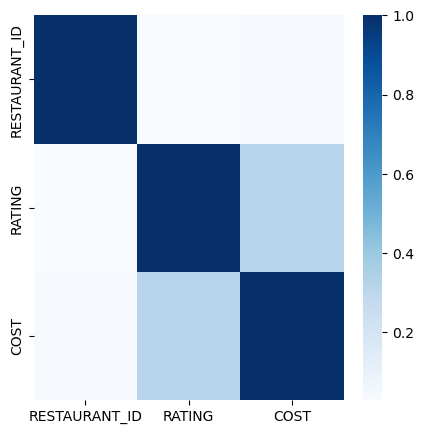

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cmap="Blues")

In [19]:
#separating numerical and categorical columns
numerical_col=[]
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

In [20]:
print('categorical column:',categorical_col)
print('numerical column:',numerical_col)

categorical column: ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']
numerical column: ['RESTAURANT_ID', 'RATING', 'COST']


In [21]:
#encoding categorical columns of train data
from sklearn.preprocessing import OrdinalEncoder

In [22]:
encoder= OrdinalEncoder()

In [23]:
df[categorical_col]= encoder.fit_transform(df[categorical_col])

In [24]:
print("\nTransformed DataFrame:")
print(df)


Transformed DataFrame:
       TITLE  RESTAURANT_ID  CUISINES    TIME   CITY  LOCALITY  RATING  COST
0       31.0           9438    2627.0   739.0  320.0     285.0     3.6  1200
1       33.0          13198     289.0  1885.0   67.0    1046.0     4.2  1500
2       31.0          10915    2976.0   661.0   67.0    1101.0     3.8   800
3       95.0           6346    4130.0   275.0  222.0     136.0     4.1   800
4       50.0          15387    1766.0   615.0  222.0     620.0     3.8   300
...      ...            ...       ...     ...    ...       ...     ...   ...
12685   95.0          13228    2934.0  1144.0  131.0     342.0     3.8   500
12686   33.0           9686    2143.0  1177.0  222.0     133.0     4.3  1800
12687   71.0          11133    2088.0  1137.0  239.0    1342.0     4.0  1300
12688   31.0           6134    3506.0  1837.0   67.0     631.0     3.5   400
12689   31.0           6430    2946.0   835.0  131.0    1333.0     3.4   600

[12690 rows x 8 columns]


In [25]:
#separating target column and columns not necessary in the analysis from data
X_train= df.drop(['COST','RESTAURANT_ID'],axis=1)
Y_train= df['COST']

In [26]:
print(X_train)
print(Y_train)

       TITLE  CUISINES    TIME   CITY  LOCALITY  RATING
0       31.0    2627.0   739.0  320.0     285.0     3.6
1       33.0     289.0  1885.0   67.0    1046.0     4.2
2       31.0    2976.0   661.0   67.0    1101.0     3.8
3       95.0    4130.0   275.0  222.0     136.0     4.1
4       50.0    1766.0   615.0  222.0     620.0     3.8
...      ...       ...     ...    ...       ...     ...
12685   95.0    2934.0  1144.0  131.0     342.0     3.8
12686   33.0    2143.0  1177.0  222.0     133.0     4.3
12687   71.0    2088.0  1137.0  239.0    1342.0     4.0
12688   31.0    3506.0  1837.0   67.0     631.0     3.5
12689   31.0    2946.0   835.0  131.0    1333.0     3.4

[12690 rows x 6 columns]
0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12690, dtype: int64


# Working on testing data

In [27]:
df1= pd.read_excel('Data_Test.xlsx')
df1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [28]:
df1.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [29]:
#handling missing values of test data
df1= df1.drop(columns=['VOTES','RESTAURANT_ID'], axis=1)

In [30]:
df1['RATING'] = df1['RATING'].replace(np.nan,0)

In [31]:
df1['RATING'] = pd.to_numeric(df1['RATING'], errors='coerce')

In [32]:
#filling nan values of rating column with mean value
df1['RATING'].fillna(df1['RATING'].mean(), inplace= True)

In [33]:
print(df1['CITY'].mode())
print(df1['LOCALITY'].mode())

0    Bangalore
Name: CITY, dtype: object
0      Kakkanad
1    Kukatpally
Name: LOCALITY, dtype: object


In [34]:
#filling missing values of columns
df1['CITY'].fillna(df1['CITY'].mode()[0], inplace= True)
df1['LOCALITY'].fillna(df1['LOCALITY'].mode()[0], inplace= True)

In [35]:
df1.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
dtype: int64

In [36]:
#separating numerical and categorical columns
numerical_col=[]
categorical_col=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

In [37]:
print('categorical column:',categorical_col)
print('numerical column:',numerical_col)

categorical column: ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']
numerical column: ['RATING']


In [38]:
#encoding categorical columns of test data
from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()
df1[categorical_col]= encoder.fit_transform(df1[categorical_col])
print("\nTransformed DataFrame:")
print(df1)


Transformed DataFrame:
      TITLE  CUISINES    TIME   CITY  LOCALITY    RATING
0      23.0    1293.0   503.0  110.0     662.0  4.300000
1      75.0    1632.0   933.0   96.0     221.0  4.200000
2      23.0    1455.0   219.0   96.0     411.0  3.800000
3      66.0     208.0  1071.0   41.0     456.0  3.800000
4      75.0    1637.0   208.0   78.0     300.0  3.600000
...     ...       ...     ...    ...       ...       ...
4226   23.0    1425.0   103.0  108.0     597.0  3.900000
4227   66.0     267.0   262.0    9.0     237.0  4.300000
4228   75.0     679.0  1052.0   41.0     696.0  3.700000
4229   75.0    1541.0   215.0   78.0     332.0  3.779561
4230   75.0    1145.0   781.0    8.0     580.0  3.700000

[4231 rows x 6 columns]


# Creating Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:
#creating model
model= RandomForestClassifier()
model.fit(X_train, Y_train)
X_train_prediction= model.predict(X_train)
train_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [41]:
print('Accuracy:',train_data_accuracy)

Accuracy: 0.9991331757289205


# Prediction on testing data

In [42]:
input_data= (df1)
data= np.asarray(input_data)
reshape= data.reshape(4231,6)

In [43]:
output= model.predict(reshape)
print(output)

[1100 1500  600 ...  300  300  300]


In [45]:
output.shape

(4231,)